Lembrar cabeçalho + nomes + nusp

In [9]:
 import Pkg; Pkg.add("PyPlot")
 import Pkg; Pkg.add("WAV")
 import Pkg; Pkg.add("DSP")
 import Pkg; Pkg.add("Statistics")
 using PyPlot
 using Statistics
 using WAV
 using DSP

   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`


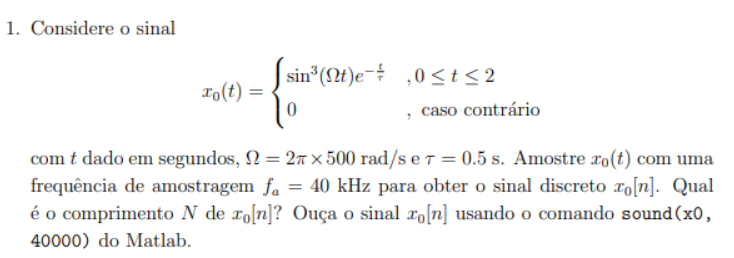

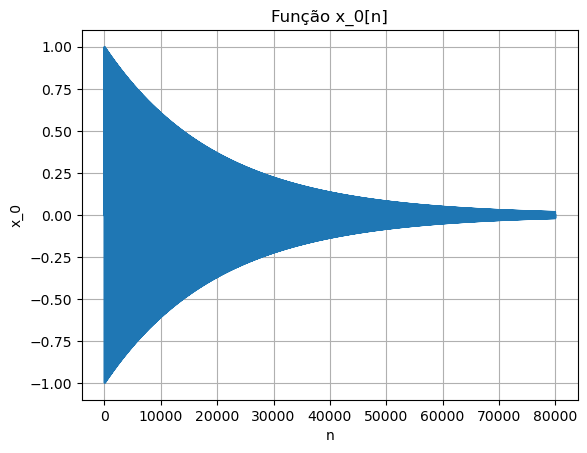

In [57]:
#Pedro
#fa = 40kHz -> Ta = 0,0000025 s -> Há 80000 amostras entre 0 e 2s
Nit = 80000
n = 0:Nit-1
Ω = 2*pi*500
fa = 40e3
τ = 0.5
x0 = ((sin.(Ω * n / fa)).^3).*exp.(-(n/fa)/τ)
plot(n,x0)
grid()
xlabel("n")
ylabel("x_0")
title("Função x_0[n]");
wavplay(x0, fa)

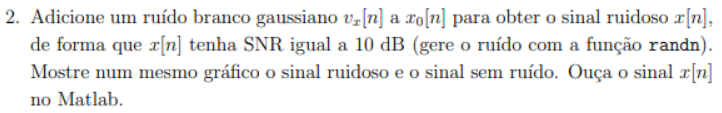

In [31]:
pot_x = mean(x.^2)
pot_v = pot_x/10
v = sqrt(pot_v).*randn(Nit,1);

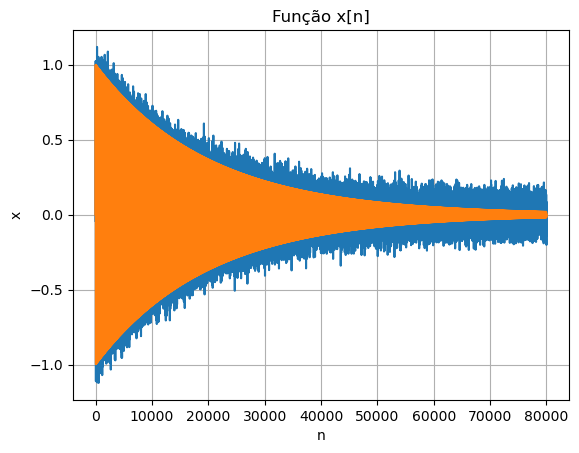

In [56]:
x = x0+v
plot(n, x, label = "x[n]")
grid()
xlabel("n")
ylabel("x")
title("Função x[n]");
plot(n, x0, label = "x0[n]")
wavplay(x, fa)

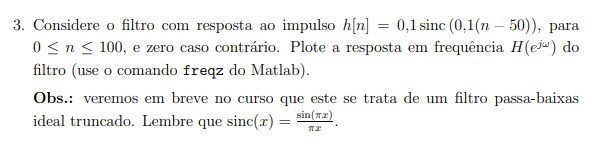

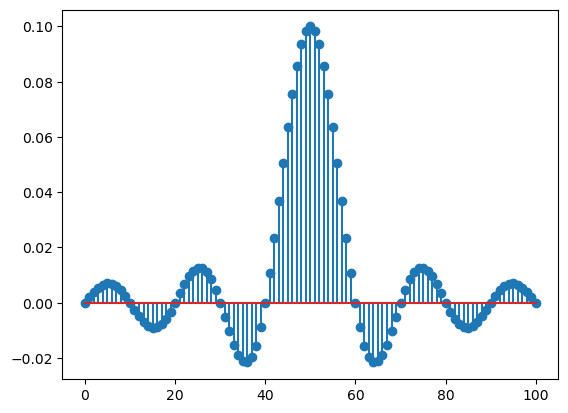

(PyObject <matplotlib.lines.Line2D object at 0x000000008B35C9D0>, PyObject <matplotlib.collections.LineCollection object at 0x000000008B34C100>, PyObject <matplotlib.lines.Line2D object at 0x000000008B35CD30>)

In [67]:
n_h = 0:100

h = 0.1*sinc.(0.1*(n_h.-50))
stem(n_h, h)

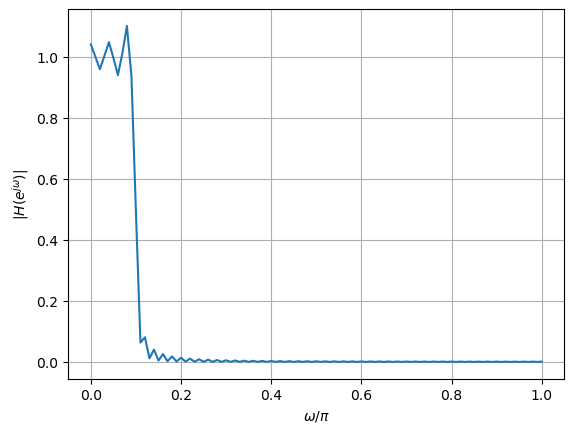

In [75]:
hf= PolynomialRatio(h,[1]);
ω = range(0,π, length=101);
H = freqz(hf, ω);
plot(ω/π, abs.(H))
xlabel(L"\omega/\pi")
ylabel(L"|H(e^{j\omega})|")
grid();

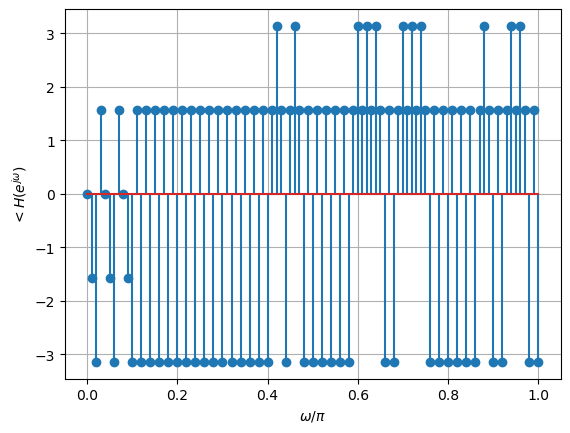

In [80]:
stem(ω/π, angle.(H))
xlabel(L"\omega/\pi")
ylabel(L"<H(e^{j\omega})")
grid();

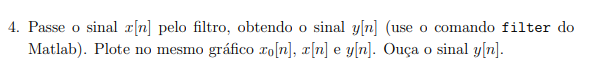

In [ ]:
y = filt(h, x)
plot(n, y)
plot(n, x)
plot(n, x0)